# Structure learning to use cancer dataset


In [1]:
import pandas as pd
from dlbn.estimators import *

Reading data

In [2]:
data = pd.read_csv(r"../datasets/cancer.csv",index_col=0)
data.head(5)

,Pollution,Smoker,Cancer,Xray,Dyspnoea
0,low,False,False,negative,False
1,low,False,False,negative,False
2,low,False,False,positive,True
3,low,False,False,positive,True
4,low,False,False,negative,False


Reading truth dag

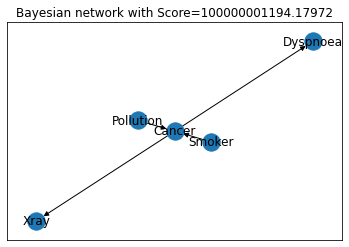

In [3]:
truth_dag = DAG()
truth_dag.read_excel(r"../datasets/cancer net.xlsx")
truth_dag.show(MDL_score,data)

## Dynamic program: shortest path perspective

In [4]:
est1 = estimator(data)
est1.run()

Adding cost: 100%|██████████| 80/80 [00:01<00:00, 46.35it/s] 


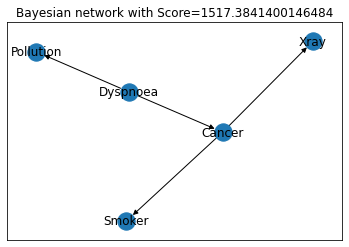

In [5]:
est1.show()

## Greedy Hill Climb

In [6]:
est2 = HC_estimator(data)
est2.run(score_method=MDL_score,direction='down')

Hill climbing:   0%|          | 4/1000 [00:00<01:18, 12.74it/s]


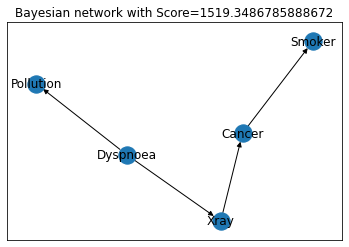

In [7]:
est2.show()

## Calculate SHD

In [8]:
print("SHD for dynamic program:{}".format(est1.result_dag-truth_dag))
print("SHD for Hill climb:{}".format(est2.result_dag-truth_dag))

SHD for dynamic program:6
SHD for Hill climb:8
